# Import Data

In [1]:
#importing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read csv
df = pd.read_csv('Clicked Ads Dataset.csv')

#showing all columns
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df = df.drop('Unnamed: 0', axis = 1)

# Exploratory Data Analysis (EDA)

In [5]:
# general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [6]:
# rename some columns
df.rename(columns={'Daily Time Spent on Site': 'Daily_Time_Spent_on_Site',
                'Area Income': 'Area_Income',
                'Daily Internet Usage' : 'Daily_Internet_Usage',
                'Male' : 'Gender',
                'Clicked on Ad' : 'Clicked_on_Ad' }, inplace=True)

## Statistical Analysis

In [7]:
# define numerical and categorical feature
cats = ['Gender', 'Timestamp','Clicked_on_Ad','city','province','category']
nums = ['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage']
# statistical summary from numeric feature
df[nums].describe()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [8]:
# statistical summary from categorical feature
df[cats].describe()

,Gender,Timestamp,Clicked_on_Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


## Univariate Analysis

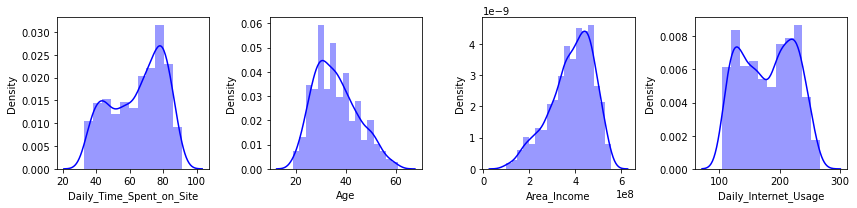

In [9]:
#showing numerical features distribution 
features = nums
plt.figure(figsize=(12, 3))
for i in range(0, len(features)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[features[i]], color='blue', kde = True)
    plt.xlabel(features[i])
    plt.tight_layout()

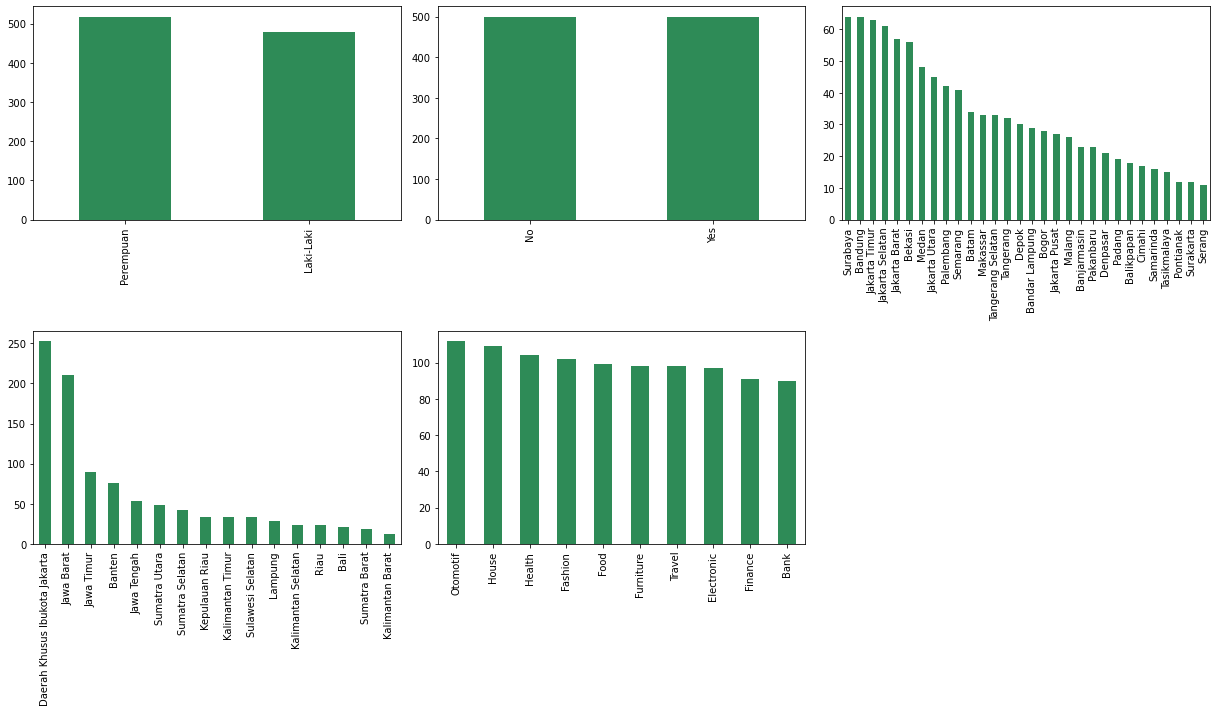

In [10]:
#categorical analysis
cats.remove('Timestamp')
plt.figure(figsize = (17,10))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    df[cats[i]].value_counts().plot(kind="bar", color = 'seagreen')
    plt.tight_layout()

## Bivariate Analysis

<AxesSubplot:>

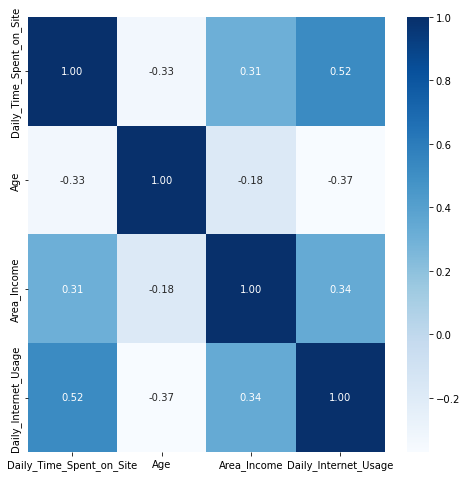

In [11]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

## Multivariate

<Figure size 1080x1080 with 0 Axes>

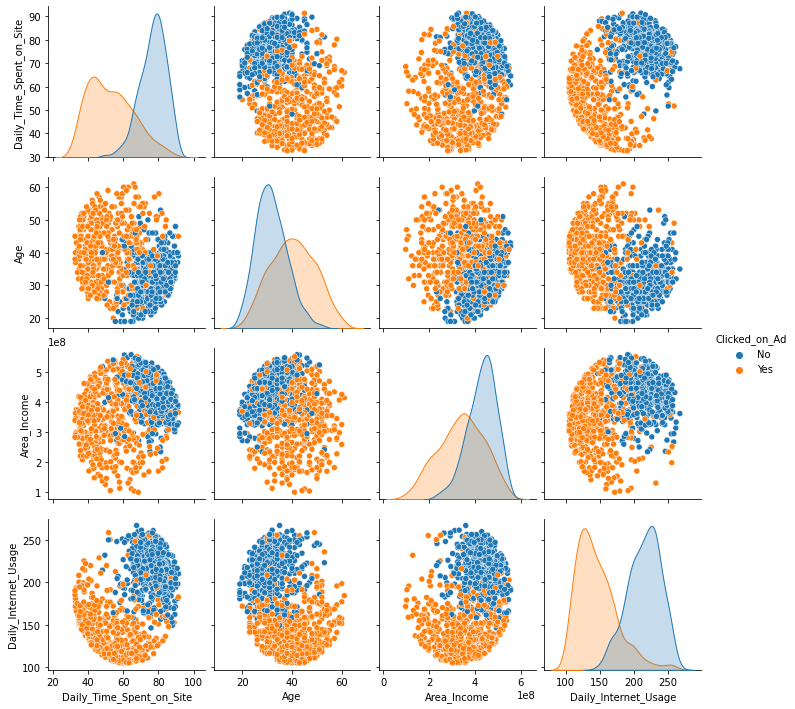

In [12]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue = 'Clicked_on_Ad')

# Data Cleaning & Preprocessing

## Cleaning Data

In [13]:
df.isnull().sum()

Daily_Time_Spent_on_Site    13
Age                          0
Area_Income                 13
Daily_Internet_Usage        11
Gender                       3
Timestamp                    0
Clicked_on_Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [14]:
#filling missing value in some features with median
mv = ['Daily_Time_Spent_on_Site','Area_Income','Daily_Internet_Usage']    
for i in mv :
    df[i].fillna(df[i].median(),inplace = True)
    
#drop gender missing value rows
df.dropna(inplace = True)

#check missing value after cleaning
df.isnull().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area_Income                 0
Daily_Internet_Usage        0
Gender                      0
Timestamp                   0
Clicked_on_Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [15]:
#check duplicated data
df.duplicated().sum()

0

## Feature Engineering

In [16]:
#change Timestamp datatype
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#add extract time feature
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['week'] = df['Timestamp'].dt.week
df['day'] = df['Timestamp'].dt.day

#show dataset
df.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Gender,Timestamp,Clicked_on_Ad,city,province,category,year,month,week,day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3


## Feature Encoding

In [17]:
#lABEL ENCODING
df['Gender'] = np.where(df['Gender'] == 'Perempuan',0,1) #gender
df['Clicked_on_Ad'] = np.where(df['Clicked_on_Ad'] == 'Yes',1,0) #clicked on ad

#ONE HOT ENCODING
for cat in ['city','province','category']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [18]:
#drop some columns
df = df.drop(['Timestamp','city','province','category'], axis = 1)

#show dataset
df.sample(2)

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Gender,Clicked_on_Ad,year,month,week,day,city_Balikpapan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,city_Pakanbaru,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
61,85.84,34,452582620.0,192.93,1,0,2016,6,24,15,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
181,84.53,27,285341910.0,168.34,0,1,2016,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Feature Transformation

In [19]:
from sklearn.preprocessing import StandardScaler

df_std = df.copy()
df_std[nums] = StandardScaler().fit_transform(df_std[nums])

# Classification Modeling

## Split Train and Test Data

In [20]:
#define X dan y
X = df.drop(columns=['Clicked_on_Ad'])
y = df['Clicked_on_Ad'] #target

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #80 train data : 20 test data

In [21]:
# USING STANDARDIZED DATA

#define X dan y for modeling 
X_std = df_std.drop(columns=['Clicked_on_Ad'])
y_std = df_std['Clicked_on_Ad'] #target

#Splitting the data into Train and Test
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size = 0.2, random_state = 42) #80 train data : 20 test data

## Modeling Unstandardized Data

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

#define function to call evaluation model
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)


y_pred = model_lr.predict(X_test)
eval_classification(model_lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.48
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
solver = ['liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres with Gridsearch, cross validation = 5
model_lr = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42)

# Fitting Model & Evaluation
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
eval_classification(model_lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.97
Recall (Test Set): 0.91
F1-Score (Test Set): 0.94
AUC: 0.94


### K-Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
eval_classification(model_knn, y_pred_knn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.69
Recall (Test Set): 0.64
F1-Score (Test Set): 0.66
AUC: 0.67


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model_knn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42)

# Fit Model & Evaluasi
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
eval_classification(model_knn, y_pred_knn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.76
Recall (Test Set): 0.62
F1-Score (Test Set): 0.68
AUC: 0.71


### Decission Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train,y_train)

y_pred_dt = model_dt.predict(X_test)
eval_classification(model_dt, y_pred_dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.93
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
AUC: 0.93


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 5)]
min_samples_split = [10,20,30,40,50,60,70,80] 
min_samples_leaf = [1,2,10,40,50] 
max_features = ['auto','sqrt'] 

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42)
model_dt.fit(X_train, y_train)

# Predict & Evaluation
y_pred_dt = model_dt.predict(X_test)#Check performa dari model
eval_classification(model_dt, y_pred_dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.88
Recall (Test Set): 0.96
F1-Score (Test Set): 0.92
AUC: 0.91


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
eval_classification(rf, y_pred_rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.96


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
    bootstrap = [True],
    criterion = ['entropy'],
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
    min_samples_split = [4],
    min_samples_leaf = [1,2],
    max_features = ['auto', 'sqrt', 'log2'],
    n_jobs = [-1],
        )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42)
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred_rf = rf_tuned.predict(X_test)
eval_classification(rf_tuned, y_pred_rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.95


In [31]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf_tuned.score(X_test, y_test))) #accuracy

Train score: 0.998745294855709
Test score:0.955


### XGBoost

In [32]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)
eval_classification(xg, y_pred_xg, X_train, y_train, X_test, y_test)

[12:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.96
Precision (Test Set): 0.97
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
AUC: 0.97


In [33]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred_xg = xg_tuned.predict(X_test)
eval_classification(xg_tuned, y_pred_xg, X_train, y_train, X_test, y_test)

[12:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Modeling Standardized Data

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
model_lr_std = LogisticRegression(random_state=42)
model_lr_std.fit(X_train_std, y_train_std)

y_pred_std = model_lr_std.predict(X_test_std)
eval_classification(model_lr_std, y_pred_std, X_train_std, y_train_std, X_test_std, y_test_std)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.96


In [35]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
solver = ['liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model_lr_std = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42)

# Fitting Model & Evaluation
model_lr_std.fit(X_train_std, y_train_std)
y_pred_std = model_lr_std.predict(X_test_std)
eval_classification(model_lr_std, y_pred_std, X_train_std, y_train_std, X_test_std, y_test_std)

Accuracy (Test Set): 0.94
Precision (Test Set): 1.00
Recall (Test Set): 0.89
F1-Score (Test Set): 0.94
AUC: 0.95


### K-Nearest Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier

model_knn_std = KNeighborsClassifier()
model_knn_std.fit(X_train_std, y_train_std)

y_pred_knn_std = model_knn_std.predict(X_test_std)
eval_classification(model_knn_std, y_pred_knn_std, X_train_std, y_train_std, X_test_std, y_test_std)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.93
Recall (Test Set): 0.88
F1-Score (Test Set): 0.91
AUC: 0.91


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model_knn_std = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42)

# Fit Model & Evaluasi
model_knn_std.fit(X_train_std, y_train_std)
y_pred_knn_std = model_knn_std.predict(X_test_std)
eval_classification(model_knn_std, y_pred_knn_std, X_train_std, y_train_std, X_test_std, y_test_std)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.93
Recall (Test Set): 0.88
F1-Score (Test Set): 0.91
AUC: 0.91


### Decission Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model_dt_std = DecisionTreeClassifier(random_state=42)
model_dt_std.fit(X_train_std,y_train_std)

y_pred_dt_std = model_dt_std.predict(X_test_std)
eval_classification(model_dt_std, y_pred_dt_std, X_train_std, y_train_std, X_test_std, y_test_std)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.93
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
AUC: 0.93


In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 5)]
min_samples_split = [10,20,30,40,50,60,70,80] 
min_samples_leaf = [1,2,10,40,50] 
max_features = ['auto','sqrt'] 

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt_std = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42)
model_dt_std.fit(X_train_std, y_train_std)

# Predict & Evaluation
y_pred_dt_std = model_dt_std.predict(X_test_std)#Check performa dari model
eval_classification(model_dt_std, y_pred_dt_std, X_train_std, y_train_std, X_test_std, y_test_std)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.88
Recall (Test Set): 0.96
F1-Score (Test Set): 0.92
AUC: 0.91


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_std = RandomForestClassifier(random_state=42)
rf_std.fit(X_train_std,y_train_std)

y_pred_rf_std = rf_std.predict(X_test_std)
eval_classification(rf_std, y_pred_rf_std, X_train_std, y_train_std, X_test_std, y_test_std)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.96


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
    bootstrap = [True],
    criterion = ['entropy'],
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
    min_samples_split = [4],
    min_samples_leaf = [1,2],
    max_features = ['auto', 'sqrt', 'log2'],
    n_jobs = [-1],
        )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned_std = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42)
rf_tuned_std.fit(X_train_std,y_train_std)

# Predict & Evaluation
y_pred_rf_std = rf_tuned_std.predict(X_test_std)
eval_classification(rf_tuned_std, y_pred_rf_std, X_train_std, y_train_std, X_test_std, y_test_std)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.95


### XGBoost

In [42]:
from xgboost import XGBClassifier
xg_std = XGBClassifier(random_state=42)
xg_std.fit(X_train_std, y_train_std)

y_pred_xg_std = xg_std.predict(X_test_std)
eval_classification(xg_std, y_pred_xg_std, X_train_std, y_train_std, X_test_std, y_test_std)

[12:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.96
Precision (Test Set): 0.97
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
AUC: 0.97


In [43]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg_std = XGBClassifier(random_state=42)
xg_tuned_std = RandomizedSearchCV(xg_std, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned_std.fit(X_train,y_train)

# Predict & Evaluation
y_pred_xg_std = xg_tuned_std.predict(X_test_std)
eval_classification(xg_tuned_std, y_pred_xg_std, X_train_std, y_train_std, X_test_std, y_test_std)

[12:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Feature Importance

In [44]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('FEATURE IMPORTANCE SCORE')

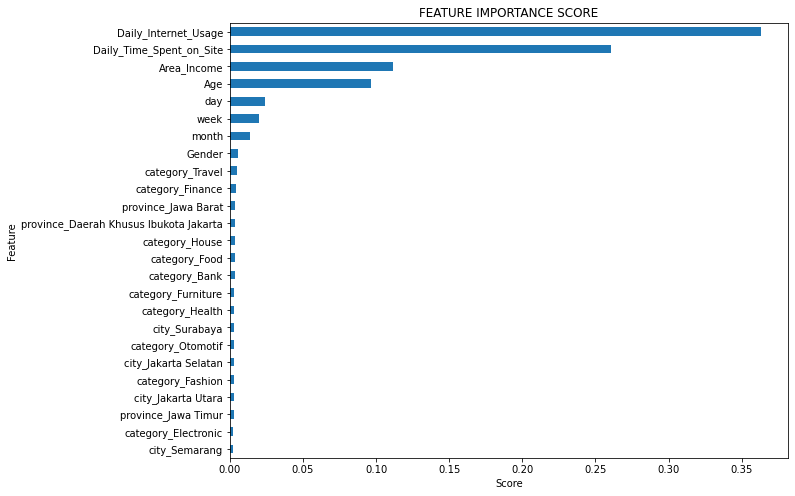

In [45]:
show_feature_importance(rf_tuned_std.best_estimator_)